In [29]:
import pandas as pd
df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
df.drop(["HOUSEID"], axis =1, inplace=True)
X = df.drop(["RAIL"], axis=1)
y = df["RAIL"]
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test

,HHFAMINC,CENSUS_D,HHSIZE,CENSUS_R,WRKCOUNT,TRAVDAY,VEHAGE,VEHTYPE,VEHFUEL,VEHOWNED,...,URBANSIZE,DRVR_FLG,TRPHHVEH,PSGR_FLG,PUBTRANS,TRIPPURP,R_AGE,WORKER,EDUC,WALK
1867,11,9,2,4,2,2,5,1,5,1,...,4,1,1,2,2,3,69,1,8,6
3988,6,3,2,2,0,7,15,1,-9,1,...,5,1,1,2,2,2,64,2,4,2
4516,8,5,1,3,1,2,7,3,1,1,...,5,1,1,2,2,4,67,1,5,-1
1397,6,3,1,2,1,4,1,3,1,1,...,5,1,1,2,2,1,53,1,6,3
1669,10,2,2,1,0,2,9,3,1,1,...,4,2,1,1,2,4,75,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,6,5,2,3,1,3,17,1,6,1,...,6,2,1,1,2,2,41,1,7,1
1253,7,7,2,3,0,5,11,1,1,1,...,3,2,1,1,2,4,71,2,6,2
3094,7,3,3,2,2,5,3,3,1,1,...,2,1,1,2,2,1,64,1,6,1
3733,6,8,2,4,0,1,12,3,1,1,...,6,1,1,2,2,3,80,2,8,6


**correlation matrix**

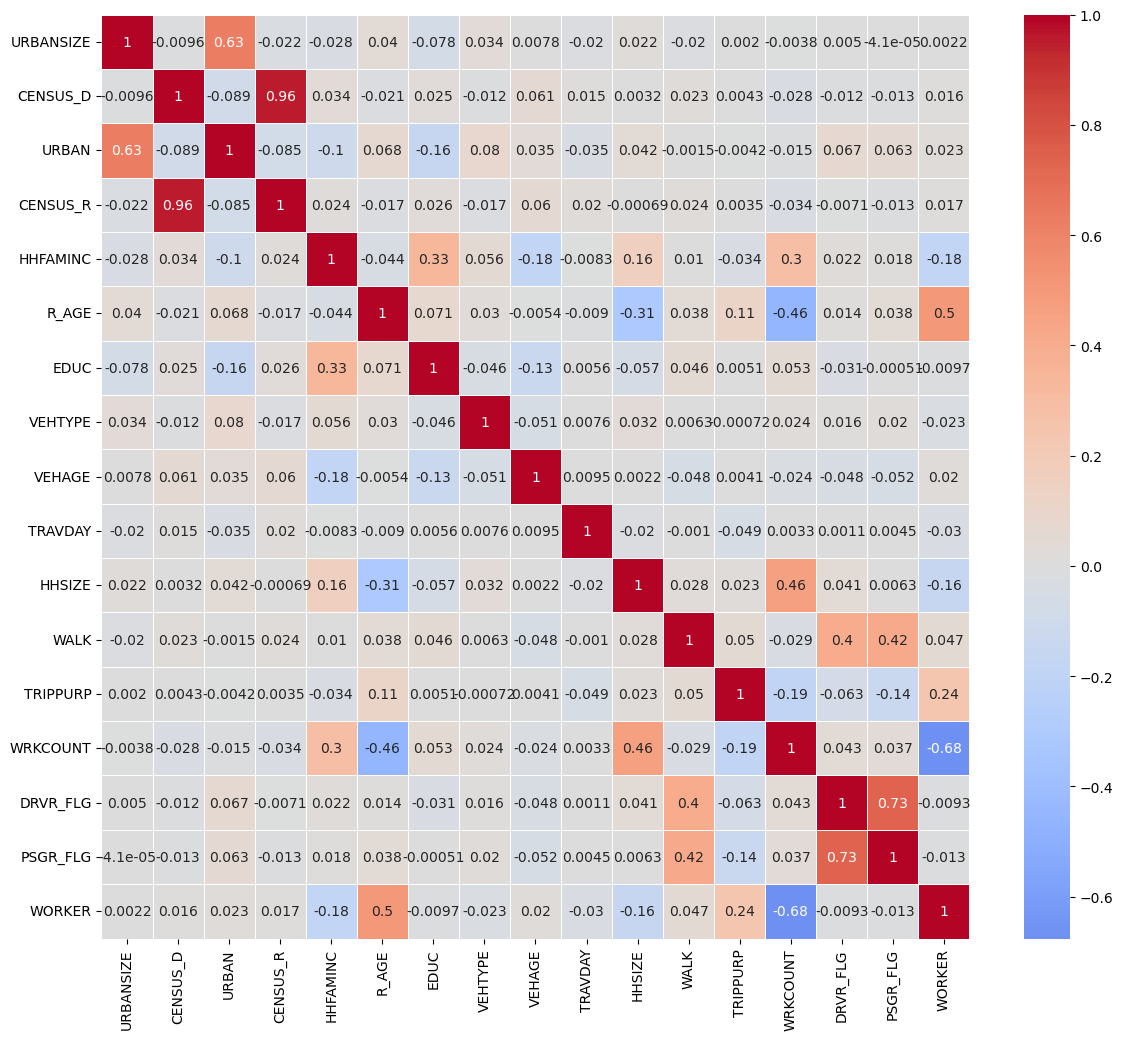

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
df.drop(["HOUSEID"], axis=1, inplace=True)

# Select specific columns
columns = ["URBANSIZE", "CENSUS_D", "URBAN", "CENSUS_R", "HHFAMINC",
           "R_AGE", "EDUC", "VEHTYPE", "VEHAGE", "TRAVDAY", "HHSIZE",
           "WALK", "TRIPPURP", "WRKCOUNT", "DRVR_FLG", "PSGR_FLG", "WORKER"]
df = df[columns]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("")
#plt.savefig("correlation_matrix_heatmap.pdf", dpi=1000)
plt.show()


**KNN
SVM
RF
Xgboost
by rail**

In [5]:
import pandas as pd
df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
df.drop(["HOUSEID"], axis =1, inplace=True)
X = df.drop(["RAIL"], axis=1)
y = df["RAIL"]

**KNN**

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=20)  # you can change k as needed

# Fit the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores (using 5-fold CV)
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Std CV Score: {cv_scores.std():.4f}")


Accuracy Score: 0.8140
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.16      0.25       237
           2       0.82      0.98      0.89       951

    accuracy                           0.81      1188
   macro avg       0.73      0.57      0.57      1188
weighted avg       0.79      0.81      0.77      1188

Cross-validation Scores: [0.78619529 0.78703704 0.79275484 0.79022746 0.79696714]
Mean CV Score: 0.7906
Std CV Score: 0.0039


**SVM**

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm = SVC(kernel='linear', random_state=42)  # 'rbf' kernel is default; you can change to 'linear', etc.

# Fit the model
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores (using 5-fold CV)
cv_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Std CV Score: {cv_scores.std():.4f}")


Accuracy Score: 0.8005
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.02       237
           2       0.80      1.00      0.89       951

    accuracy                           0.80      1188
   macro avg       0.65      0.50      0.45      1188
weighted avg       0.74      0.80      0.71      1188

Cross-validation Scores: [0.78114478 0.77861953 0.7809604  0.78348778 0.77927548]
Mean CV Score: 0.7807
Std CV Score: 0.0017


**xgb**

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Fix labels
y_fixed = y - 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_fixed, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Predict on test set
y_pred = xgb.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores (using 5-fold CV)
cv_scores = cross_val_score(xgb, X, y_fixed, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Std CV Score: {cv_scores.std():.4f}")


Accuracy Score: 0.9646
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       237
           1       0.97      0.99      0.98       951

    accuracy                           0.96      1188
   macro avg       0.96      0.92      0.94      1188
weighted avg       0.96      0.96      0.96      1188

Cross-validation Scores: [0.95791246 0.95538721 0.95113732 0.95703454 0.96714406]
Mean CV Score: 0.9577
Std CV Score: 0.0053


**models accuracy**

In [26]:
targets = ["TRPHHVEH","RAIL"]

for t in targets:
    import pandas as pd
    df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
    df.drop(["HOUSEID"], axis =1, inplace=True)
    X = df.drop([t], axis=1)
    y = df[t]

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.metrics import accuracy_score, classification_report
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Accuracy score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score of {t}: {acc:.4f}")
    
    # Classification report
    print(f"Classification Report of {t}:")
    print(classification_report(y_test, y_pred))
    
    # Cross-validation scores (using 5-fold CV)
    cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation Scores of {t}: {cv_scores}")
    print(f"Mean CV Score of {t}: {cv_scores.mean():.4f}")
    print(f"Std CV Score of {t}: {cv_scores.std():.4f}\n")

Accuracy Score of TRPHHVEH: 0.9545
Classification Report of TRPHHVEH:
              precision    recall  f1-score   support

          -1       0.32      0.26      0.29        27
           1       0.98      1.00      0.99      1056
           2       0.77      0.70      0.73       105

    accuracy                           0.95      1188
   macro avg       0.69      0.65      0.67      1188
weighted avg       0.95      0.95      0.95      1188

Cross-validation Scores of TRPHHVEH: [0.95454545 0.94949495 0.96377422 0.96377422 0.95029486]
Mean CV Score of TRPHHVEH: 0.9564
Std CV Score of TRPHHVEH: 0.0063

Accuracy Score of RAIL: 0.9613
Classification Report of RAIL:
              precision    recall  f1-score   support

           1       0.95      0.85      0.90       237
           2       0.96      0.99      0.98       951

    accuracy                           0.96      1188
   macro avg       0.96      0.92      0.94      1188
weighted avg       0.96      0.96      0.96      1188

In [8]:
import pandas as pd
df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
df.drop(["HOUSEID"], axis =1, inplace=True)
X = df.drop(["RAIL"], axis=1)
y = df["RAIL"]

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation scores (using 5-fold CV)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Std CV Score: {cv_scores.std():.4f}")


Accuracy Score: 0.9613
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.85      0.90       237
           2       0.96      0.99      0.98       951

    accuracy                           0.96      1188
   macro avg       0.96      0.92      0.94      1188
weighted avg       0.96      0.96      0.96      1188

Cross-validation Scores: [0.95707071 0.95791246 0.94860994 0.95619208 0.96377422]
Mean CV Score: 0.9567
Std CV Score: 0.0048


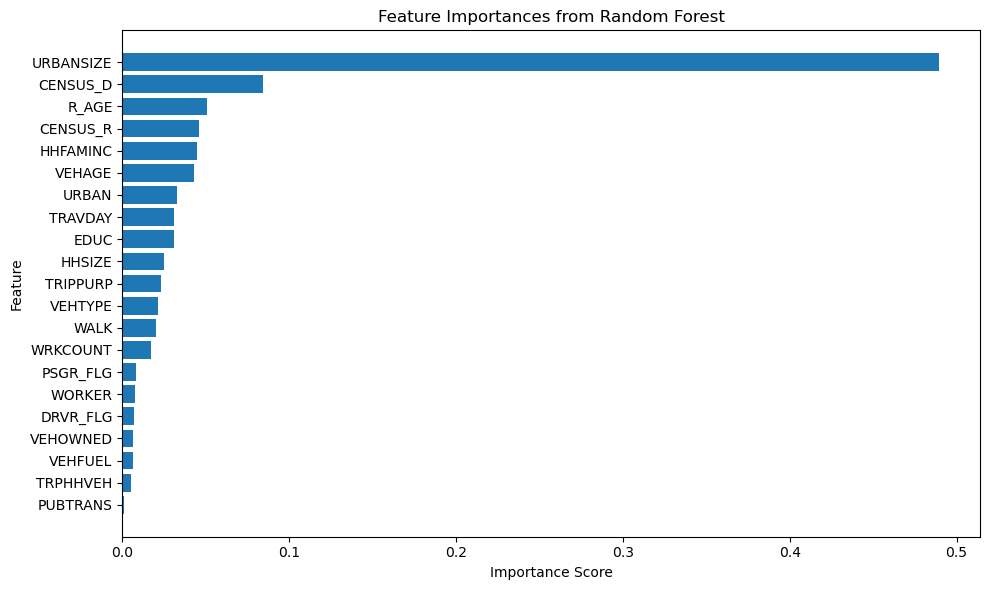

In [10]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_

# If X is a DataFrame, get column names; otherwise, generate generic names
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# Create a sorted dataframe
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Shap explaining**

In [2]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
df = pd.read_csv(r"F:\ALL Works\Ruet conference\DATA\nhts_merged.csv")
df.drop(["HOUSEID"], axis =1, inplace=True)

#df = df[df["RAIL"].isin([1,2])]
X = df.drop(["RAIL"], axis=1)
y = df["RAIL"]

# Example split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)


**shap bar plot**

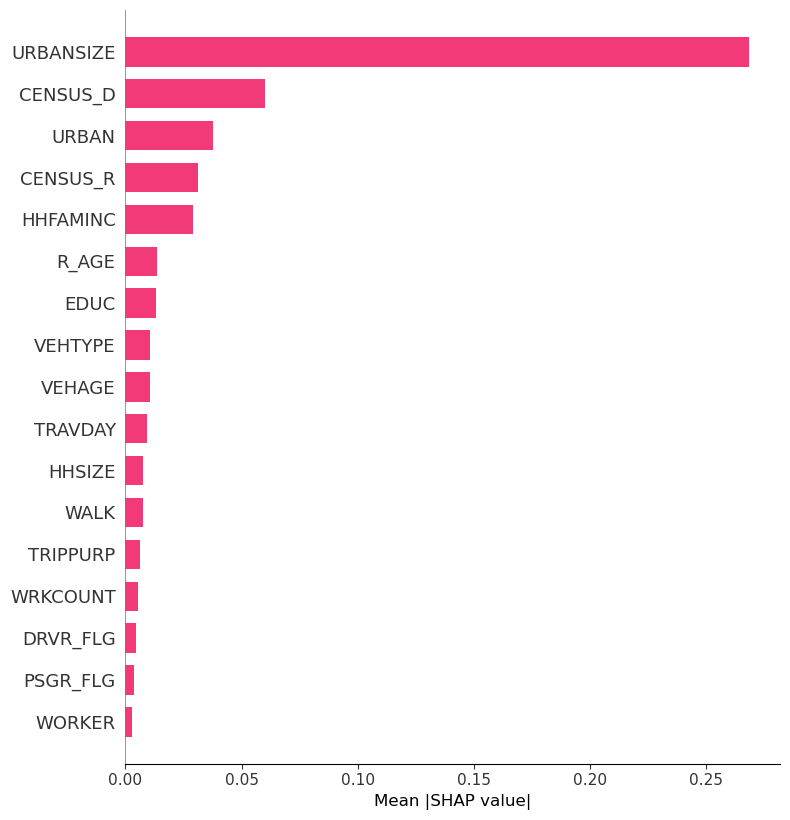

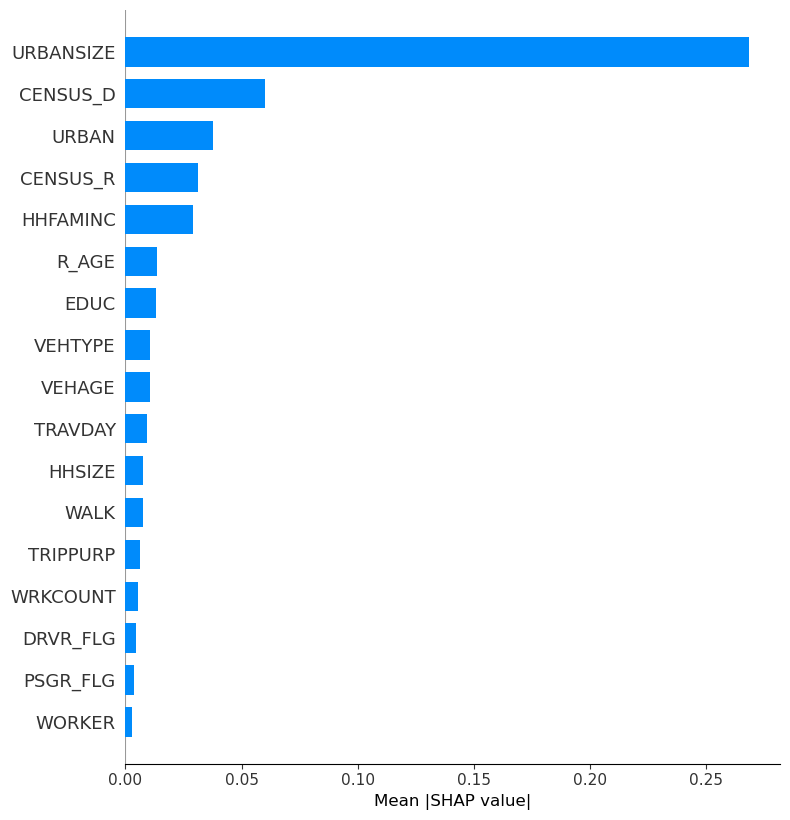

In [3]:
import matplotlib.pyplot as plt
import shap

# Extract SHAP values for both classes
shap_class0 = shap_values[:, :, 0]  # class 0 (use household)
shap_class1 = shap_values[:, :, 1]  # class 1 (don't use household)

# ---- Figure 1: Class 0 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class0, X_test, plot_type="bar", show=False, max_display=17, color="#f23a78")
#plt.title("MSA (Metropolitan Statistical Area) with Heavy Rail Access", fontweight='bold', fontsize=14, loc='left')
plt.title("")
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("MSA_with_Heavy_Rail_Access.pdf", dpi=1000)
plt.show()

# ---- Figure 2: Class 1 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class1, X_test, plot_type="bar", show=False, max_display=17)
#plt.title("MSA (Metropolitan Statistical Area) without Heavy Rail Access", fontweight='bold', fontsize=14, loc='left')
plt.title("")
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("MSA_without_Heavy_Rail_Access.pdf", dpi=1000)
plt.show()


**beeswarm plot**

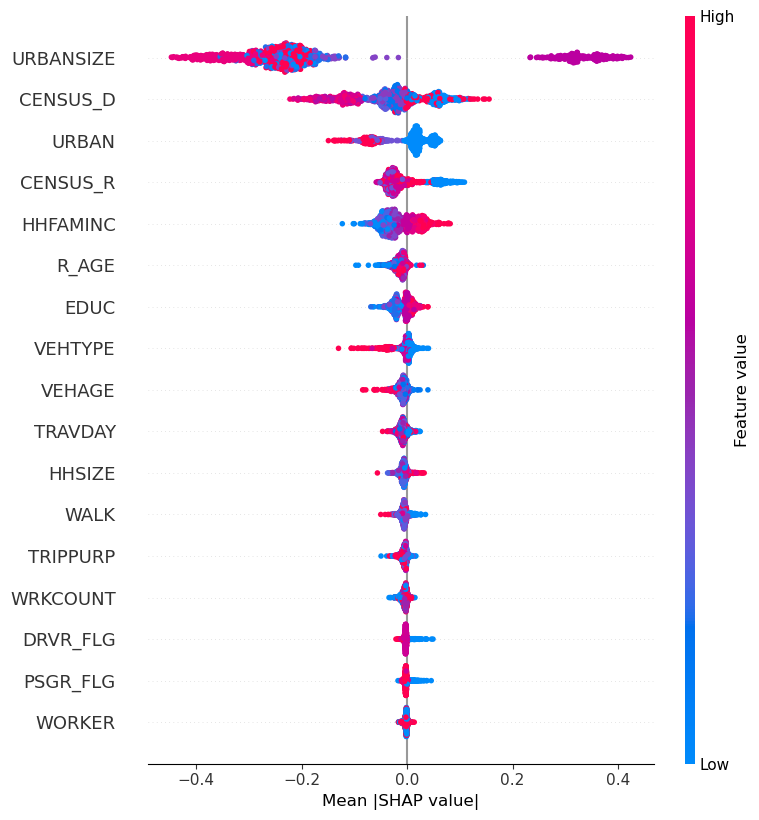

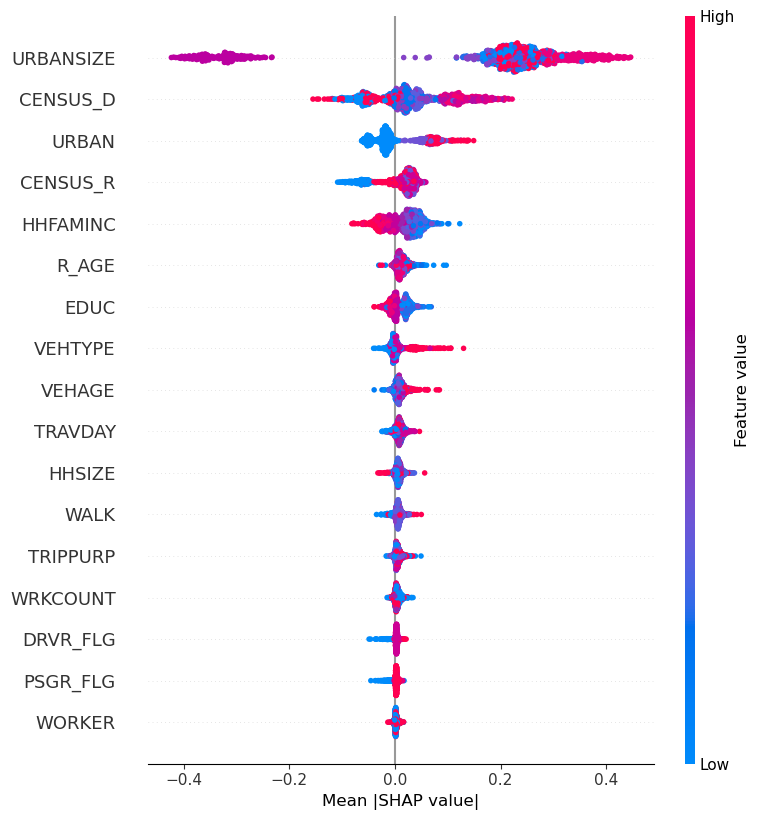

In [ ]:
import matplotlib.pyplot as plt
import shap

# Extract SHAP values for both classes
shap_class0 = shap_values[:, :, 0]  # class 0 (use household)
shap_class1 = shap_values[:, :, 1]  # class 1 (don't use household)

# ---- Figure 1: Class 0 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class0, X_test, show=False, max_display=17)
plt.title("")
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("MSA_with_Heavy_Rail_Access_beeswarm.pdf", dpi=1000)
plt.show()

# ---- Figure 2: Class 1 ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_class1, X_test, show=False, max_display=17)
plt.title("")
plt.xlabel("Mean |SHAP value|", fontsize=12)
plt.tight_layout()
plt.savefig("MSA_without_Heavy_Rail_Access_beeswarm.pdf", dpi=1000)
plt.show()


**dependency plot**

**household vehicle no use**

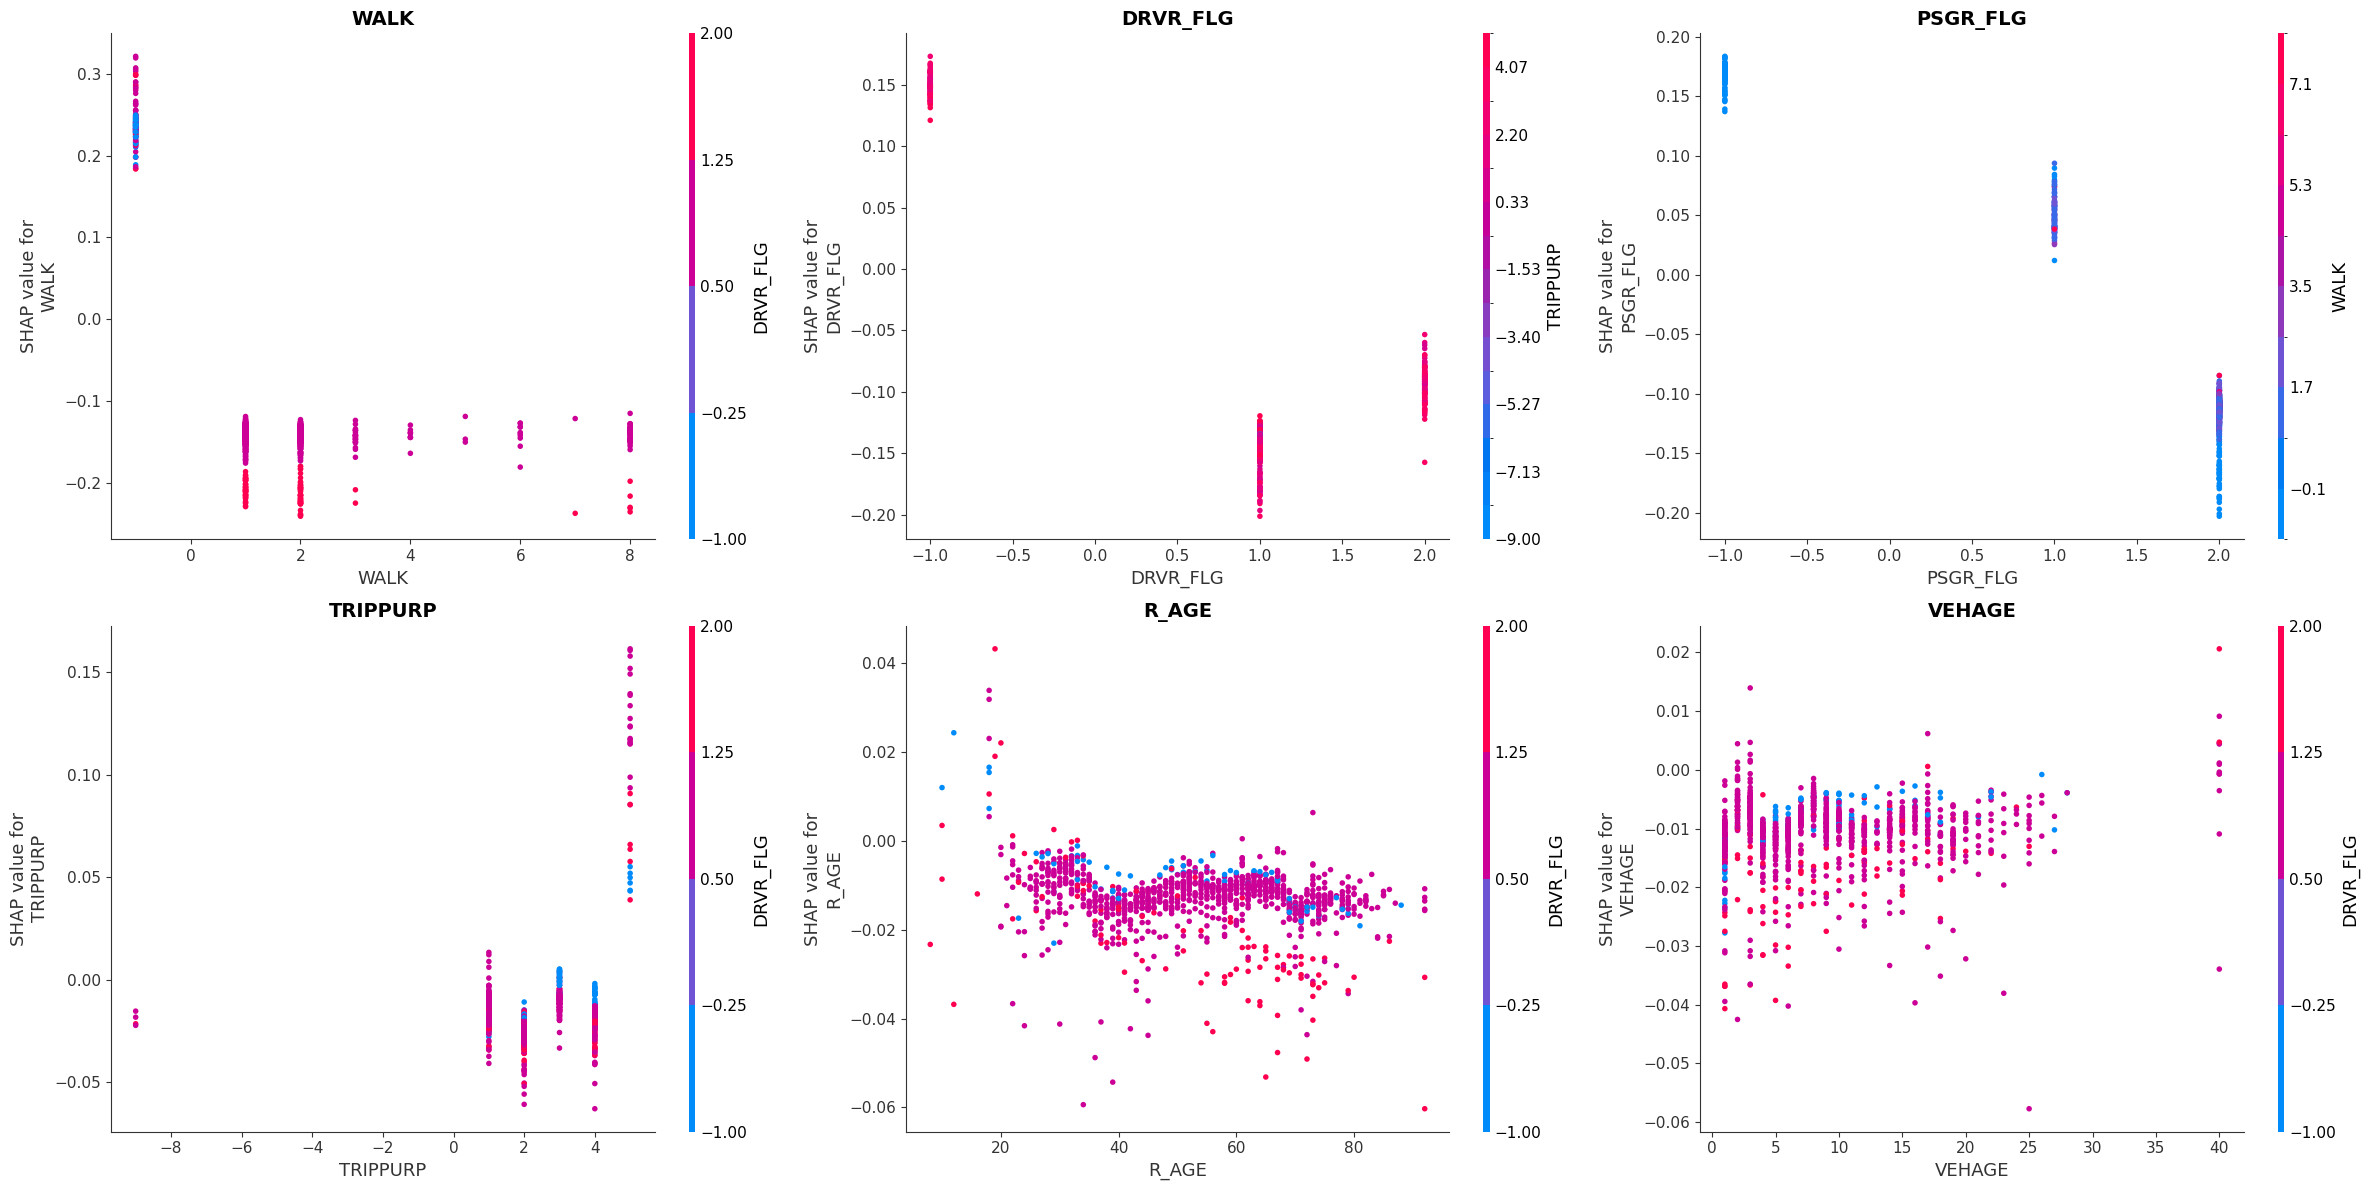

In [ ]:
import numpy as np
shap_class1 = shap_values[:, :, 1]
# Get mean absolute SHAP values to identify top features
mean_shap = np.abs(shap_class1).mean(axis=0)

# Get indices of top 6 features
top_indices = np.argsort(mean_shap)[-6:][::-1]

# Get feature names
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]

# Create figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot dependency plots
for i, index in enumerate(top_indices):
    plt.sca(axes[i])  # Set current axis
    shap.dependence_plot(
        index, shap_class1, X_test,
        ax=axes[i], show=False,
        feature_names=feature_names
        #interaction_index=None
    )
    axes[i].set_title(feature_names[index], fontweight='bold', fontsize=14)
    #axes[i].set_xlabel("")
    #axes[i].set_ylabel("")

# Hide any unused subplots (if fewer than 8 features)
for j in range(len(top_indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("shap_dependency_top6.png", dpi=1000)
plt.show()


**household vehicle use**

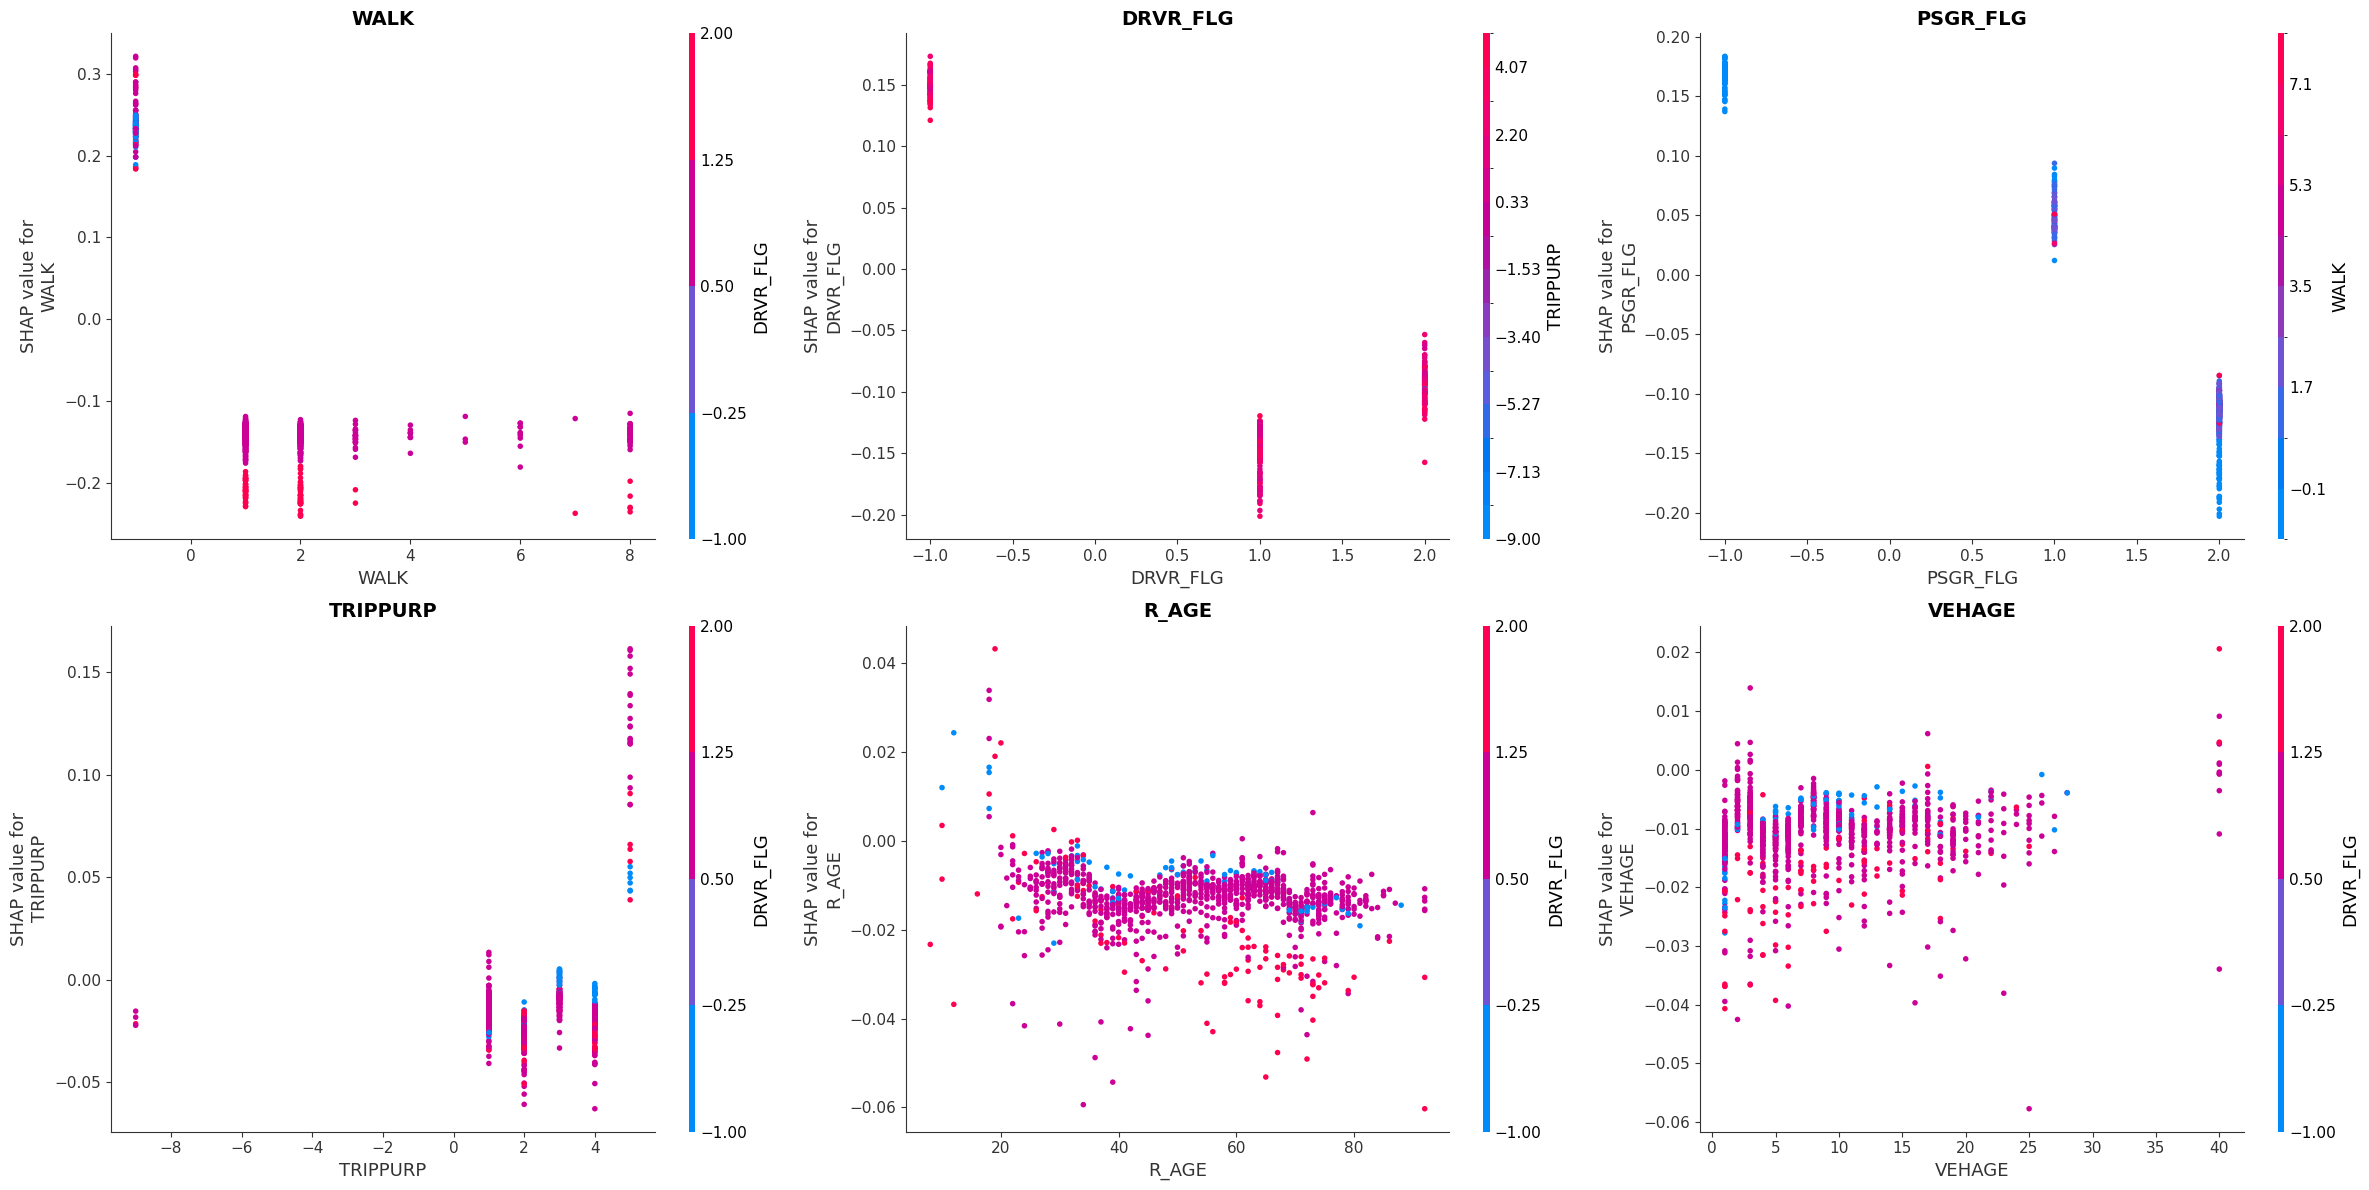

In [115]:
import numpy as np
shap_class0 = shap_values[:, :, 0]
# Get mean absolute SHAP values to identify top features
mean_shap = np.abs(shap_class0).mean(axis=0)

# Get indices of top 8 features
top_indices = np.argsort(mean_shap)[-6:][::-1]

# Get feature names
if hasattr(X_test, 'columns'):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]

# Create figure with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot dependency plots
for i, index in enumerate(top_indices):
    plt.sca(axes[i])  # Set current axis
    shap.dependence_plot(
        index, shap_class1, X_test,
        ax=axes[i], show=False,
        feature_names=feature_names
        #interaction_index=None
    )
    axes[i].set_title(feature_names[index], fontweight='bold', fontsize=14)
    #axes[i].set_xlabel("")
    #axes[i].set_ylabel("")

# Hide any unused subplots (if fewer than 8 features)
for j in range(len(top_indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("shap_dependency_house_use_top6.png", dpi=1000)
plt.show()
